## Mínimos cuadrados no lineales 

### 1. Introducción

Se trata de una extensión del método de mínimos cuadrados para cualquier posible función. Mientras que el método de mínimos cuadrados normal permite ajustar un conjunto de datos a una forma lineal (o con varias funciones base), el método de mínimos cuadrados no lineal permite ajustar un conjunto de datos a cualquier función. Los usos de este método son muy parecidos a los de mínimos cuadrados ya que de la misma forma que en el método de mínimos cuadrados se está pasando de una versión discreta en forma de puntos a una contínua en forma de una función matemática. Esto se puede aplicar a la creación de un modelo predictivo basado en un sistema no lineal, como puede ser la dinámica de fluidos o la economía. Tambien se puede usar para guardar información de forma eficiente como una función matemática.

La principal ventaja de la versión no lineal es la gran cantidad de funciones que se pueden ajustar con este método, especialmente aquellas funciones no lineales, y su principal desventaja es el coste computacional en comparación con el método de minimos cuadrados lineal. 

### 2. Derivación matemática

El método de mínimos cuadrados permite ajustar funciones de la forma $y = c_1x + c_2$ o que pudiesen ser transformadas en ella como $y = c_2e^{c_1x}$. Además, utilizando funciones base permite ajustar funciones $y = c_1f_1(x) + c_2f_2(x) + c_3f_3(x) + \cdots$ siempre y cuando $f_i(x)$ no dependa de alguno de los parámetros $c_i$. Algunos ejemplos de funciones de los tipos anteriores serían: $y = c_1\sin x + c_2\cos x$,   $y = \frac{c_1}{1 + x}$

Esto nos deja con funciones del tipo $y = f(x, \bar{c})$ donde $\bar{c}$ es un vector con componentes $c_1, c_2\cdots$. Un ejemplo de función de este tipo sería $y = \sin (c_1x) + e^{c_2x}$. De forma similar que en la versión lineal, partimos de una función $y = f(x, c_i)$ y un conjunto de $m$ puntos $x_i,\,y_i$ y queremos minimizar la suma de las diferencias de $y_j$ y el valor de la función en ese punto todo ello al cuadrado, lo que se puede expresar como: 

$$
    S = \sum_{i=0}^m (y_i - f(x_i, \bar{c}))^2
$$

Donde el problema es minimizar $S$ en función del vector $\bar{c}$. 
$y_i - f(x_i, \bar{c})$ se denomina el residuo $r_i$. Si utilizamos notación vectorial para escribir todos los residuos de foma compacta en un solo vector $\bar{r}$, toda la suma de los cuadrados se puede escribir como el módulo al cuadrado de $\bar{r}$, o lo que es lo mismo $\bar{r}^T\cdot \bar{r}$. Estamos interpretando todos los residuos $r_i$ como un vector para simplificar el problema. Cabe destacar que $\bar{r}$ depende de $\bar{c}$. 

Entonces $S$ queda:

$$
    S = \bar{r}^T\cdot \bar{r}
$$

Una forma de optimizar $S$ es igualar todas sus derivadas con respecto a $\bar{c}$ a cero, sin embargo esto supondría resolver un gran número de ecuaciones que pueden no tener solución exacta dependiendo del número de elementos de $\bar{c}$. Por ello se debe utilizar otro método para optimizar $S$

#### Algoritmo de Levengberg-Marquardt

Uno de los métodos más comunes (y que tenemos a nuestra disposición en la librería Scipy) es el algoritmo de Levenberg–Marquardt, que interpola entre dos métodos, el método de Gauss-Newton y el método de descenso de gradiente:

1. Método de Gauss-Newton: Aplica el método iterativo de Newton para encontrar los ceros del sistema que forman todas las derivadas de $S$, con lo que se encuentra un extremo.

2. Método de descenso de gradiente: Utiliza el gradiente de una función, siguiendo la dirección de máximo cambio hasta dar con un mínimo. En tres dimensiones esto se puende visualizar como dejar caer una canica en algún punto de la superficie y seguirla hasta que se quede parada

Tenemos una interpolación entre ambos para asegurar que el extremo encontrado sea un mínimo local. No está asegurado que se encuentre el mínimo absoluto, pero, como el método de Newton, converge bastante rápido y es capaz de llegar a una solución incluso con un mal punto de inicio. 

De forma general el método de Gauss-Newton utiliza la siguiente iteración para aproximarse al óptimo:

$$
    \bar{c}_{n + 1} = \bar{c}_{(n)} - (\bar{J}^T\cdot\bar{J})^{-1}\bar{J}^T\bar{r}(\bar{c}_{(n)})
$$

Donde $\bar{J}$ es el jacobiano (La matriz con todas las posibles derivadas) del vector $r$ (recordamos que el residuo depende de las componentes del vector $\bar{c}$). Esta fórmula puede ser derivada a partir de una expansión en Taylor y despreciando los términos de orden mayor tal y como se puede hacer con el método de Newton en una dimensión. El motivo por el cual toma esta forma tan complicada es porque el Jacobiano puede no ser una metriz cuadrada, dandose este caso, llamado sobredeterminado, cuando el número de puntos es mayor que el número de parámetros. La expresión que multiplica a $\bar{r}(\bar{c}_{(n)})$ es llamada a veces el pseudoinverso. Si el numero de parámetros es igual a el número de puntos entonces la iteración toma esta forma que resulta más familiar: 

$$
    \bar{c}_{n + 1} = \bar{c}_{(n)} - (\bar{J})^{-1}\bar{r}(\bar{c}_{(n)})
$$

Esta iteración es la iteración para resolver un sistema en varias dimensiones.

Como útima nota se puede decir que este algoritmo permite asignar peso o ponderación a cada uno de los residuos. Con esto se puede filtrar medidas o datos que se sepan son imprecisos

#### Otros métodos

Existen otros métodos para optimizar $S$, algunos utilizan conceptos del álgebra lineal como utilizar una descomposición del jacobiano de los residuos, otros aplican el método Simplex para la optimización. 

### 3. Ejemplo de utilización en Python

En lugar de codificar una función con alguno de los métodos descritos arriva hemos decidido utilizar una parte de la librería scipy llamada optimize que contiene la función curve_fit. Esta función implementa varios métodos de mínimos cuadrados no lineales, en específico estaremos utilizando el algoritmo de Levenberg–Marquardt. curve_fit toma una función $y = f(x, \bar{c})$ dependiente de $x$ y de un vector de parámetros $\bar{c}$ y dos arrays de los valores $x$ e $y$ de los puntos con respecto a los cuales ajustar. La función entonces devuelve una array con los óptimos para $\bar{c}$ y una medida de la covarianza de los óptimos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Veamos primero un ejemplo de una práctica vista en Técnicas experimentales básicas

In [19]:
def B_solenoide(x, mu_0): # Esta es la función que pasaremos a curve_fit. toma en este caso una posición x y un parámetro que será el ajustado 
    # Estos valores se determinaron en el laboratorio
    N = 75
    I = 3.2
    L = 16 # Esta medida está en centímetros
    R = 2.5
    # Esta expresión es la función para el centro de un solenoide en función de la distancia a su centro
    return ((mu_0*N*I)/(2*L))*((x + L/2)/(np.sqrt((x + L/2)**2 + R**2)) - (x - L/2)/(np.sqrt((x - L/2)**2 + R**2)))

In [20]:
# Distancias al centro [cm]
x = np.arange(-14, 16, 1)

In [21]:
y = np.array([0, 0.02, 0.02, 0.03, 0.08, 0.17, 0.42, 0.93, 1.42, 1.7, 1.8, 1.82, 1.85, 1.85, 1.85, 1.85, 1.85, 1.83, 1.8, 1.7, 1.6, 1.07, 0.41, 0.17, 0.08, 0.04, 0.02, 0.01, 0.01, 0.01])
#y = np.array([0.06, 0.08, 0.11, 0.21, 0.35, 0.55, 0.93, 1.23, 1.52, 1.68, 1.71, 1.77, 1.79, 1.78, 1.8, 1.8, 1.76, 1.77, 1.73, 1.64, 1.51, 1.28, 0.96, 0.56, 0.29, 0.18, 0.12, 0.12, 0.03, 0.01])

In [22]:
# Aquí llamaremos a la función curve_fit

c_optimo, c_covarianza = curve_fit(B_solenoide, x, y)

print(f"Hemos obtenido un valor para mu_0 de {c_optimo[0]*10} [mT·mm·A^(-1)]. En comparación el valor real es {4*np.pi*1e-7*1e6} [mT·mm·A^(-1)]")
print(f"La covarianza es de {c_covarianza}")

Hemos obtenido un valor para mu_0 de 1.2194458746411343 [mT·mm·A^(-1)]. En comparación el valor real es 1.2566370614359172 [mT·mm·A^(-1)]
La covarianza es de [[1.60878704e-05]]


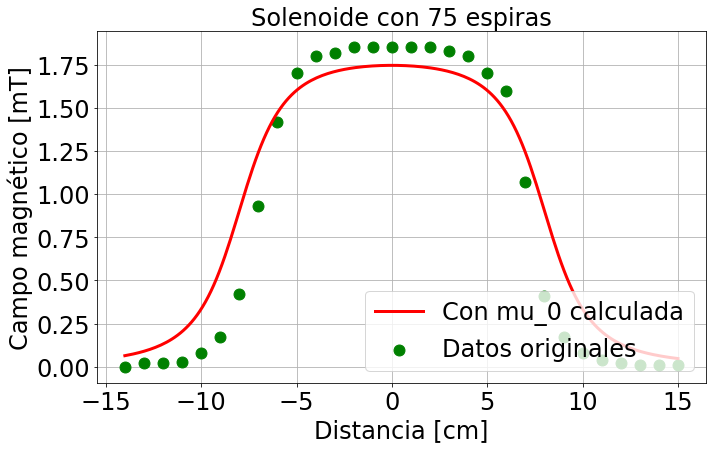

In [30]:
# Hacemos las gráficas
plt.figure(figsize=(10, 6))
plt.grid(True)

plt.scatter(x, y, s = 120, c="green", label="Datos originales", zorder=2)
t = np.linspace(-14, 15, 200)
plt.plot(t, B_solenoide(t, c_optimo) , c="red", linewidth=3, label="Con mu_0 calculada", zorder= 4)
plt.xlabel("Distancia [cm]", fontsize=24)
plt.ylabel("Campo magnético [mT]", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc="lower right", fontsize = 24)
plt.tight_layout()
plt.title("Solenoide con 75 espiras", fontsize=24)
plt.show()

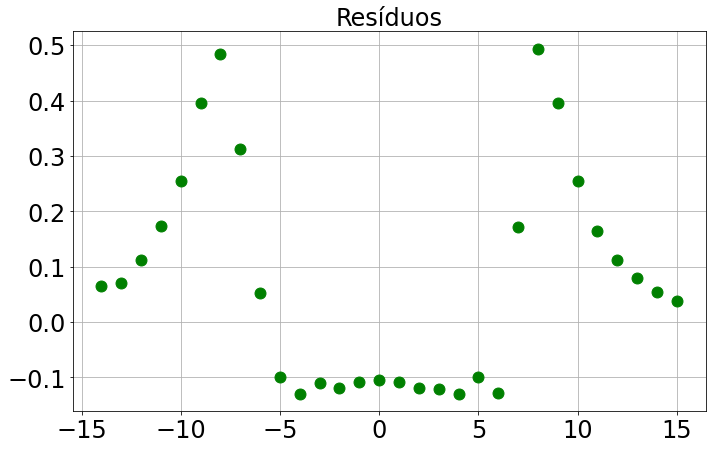

In [32]:
# podemos representar los residuos
y_calc = B_solenoide(x, c_optimo)

r = y_calc - y

plt.figure(figsize=(10, 6))
plt.grid(True)

plt.scatter(x, r, s = 120, c="green", zorder=2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.title("Resíduos", fontsize=24)
plt.show()

#### Veamos un ejemplo de un ajuste con varios parámetros.

En este caso la función usada es la posición de un oscilador amortiguado con respecto al tiempo

In [8]:
def f(x, c_1, c_2): # Esta es la función que pasaremos a curve_fit. toma en este caso una posición x y dos parámetros
    return 4*np.exp(-1*x*c_1)*np.cos(c_2*x) # en este caso se trata de declinación exponencial sinusoidal como la de un oscilador amortiguado

En este caso se trata de tomar estos parametros (0.5, 2) para generar datos y luego recuperarlos usando curve_fit. Se añade un poco de ruido para modificar el resultado. Este procedimiento sirve como ejercicio.

El ruido es pseudo-aleatorio en función de una distribución normal. La función toma la media y la desviación estandar de una curva Gaussiana en conjunto con la cantidad de muestras a tomar y devuelve una muestra con las características determinadas.

In [11]:
x = np.linspace(0, 5, 10) 
x += (np.random.normal(0, 0.1, len(x))) 
x

array([-0.2153994 ,  0.47186106,  1.00858584,  1.786616  ,  2.19739223,
        2.90039862,  3.35457603,  3.81109481,  4.55625397,  5.10518408])

In [15]:
y = f(x, 0.5, 2) + (np.random.normal(0, 0.3, len(x))) 
y

array([ 4.16988294,  1.94594506, -1.46009132, -1.44912886, -1.02410789,
        1.28746086,  0.5583754 ,  0.07856396, -0.14329987, -0.36672227])

In [16]:
# Aquí llamaremos a la función curve_fit

c_optimo, c_covarianza = curve_fit(f, x, y)
print(f"Los parámetros obtenidos son c_1 = {c_optimo[0]} y c_2 = {c_optimo[1]}")

Los parámetros obtenidos son c_1 = 0.4537667025522453 y c_2 = 1.994400797024874


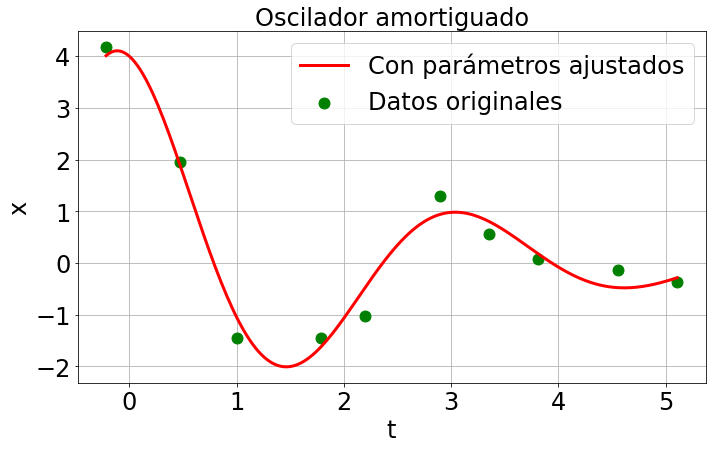

In [17]:
# Hacemos las gráficas
plt.figure(figsize=(10, 6))
plt.grid(True)

plt.scatter(x, y, s = 120, c="green", label="Datos originales", zorder=2)
t = np.linspace(min(x), max(x), 200)
plt.plot(t, f(t, c_optimo[0], c_optimo[1]) , c="red", linewidth=3, label="Con parámetros ajustados", zorder= 4)
plt.xlabel("t", fontsize=24)
plt.ylabel("x", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc="upper right", fontsize = 24)
plt.tight_layout()
plt.title("Oscilador amortiguado", fontsize=24)
plt.show()

### 4. Referencias

- Función utilizada: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit
- Derivación matemática: 
    1. https://archive.siam.org/books/textbooks/fr18_book.pdf (Capítulo 2, parte 4)
    2. Björck, A. (1996). Numerical methods for least squares problems. SIAM, Philadelphia. (Capítulo 9)
    3. https://mathworld.wolfram.com/NonlinearLeastSquaresFitting.html
- Lectura general: 
    1. https://www.wikiwand.com/en/Non-linear_least_squares#
    2. https://www.wikiwand.com/en/Levenberg%E2%80%93Marquardt_algorithm
    3. https://www.wikiwand.com/en/Gauss%E2%80%93Newton_algorithm#